In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
import os

## LOAD IMAGES

In [3]:
root_path = "/home/ivanstefanov/dev/ml/datasets/chinese/"

In [4]:
images_path = root_path + "data/data"

images_raw = []
for image_name in os.listdir(images_path):
    image = os.path.join(images_path, image_name)
    images_raw.append(plt.imread(image))

In [5]:
images = np.array(images_raw)

In [6]:
images = images.reshape(15000, 64, 64, 1)

In [7]:
images.shape

(15000, 64, 64, 1)

## LOAD LABELS

In [8]:
labels_file = root_path + "chinese_mnist.csv"

labels_df = pd.read_csv(labels_file)

In [9]:
labels = pd.get_dummies(labels_df["value"], drop_first=True)

In [10]:
labels.shape

(15000, 14)

## SPLIT INTO TRAIN AND TEST SETS

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=.3, random_state=69)

In [13]:
X_train.shape

(10500, 64, 64, 1)

In [14]:
y_train.shape

(10500, 14)

# PREPARE THE MODEL

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Input, MaxPool2D, Flatten

2021-10-16 23:58:30.814216: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-10-16 23:58:30.814237: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [16]:
model = Sequential([
#     Flatten(),
#     Input(shape=(64,64, 1)),
#     Conv2D(filters=4, kernel_size=(5, 5), activation="relu"),
#     MaxPool2D(pool_size=(3, 3)),
    Flatten(),
    Dense(256, activation="relu"),
    Dense(128, activation="relu"),
    Dense(64, activation="relu"),
    Dense(14, activation="softmax")
])

2021-10-16 23:58:32.083816: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-10-16 23:58:32.083842: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-10-16 23:58:32.083861: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (mint-vostro): /proc/driver/nvidia/version does not exist
2021-10-16 23:58:32.084084: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [17]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [18]:
model.fit(X_train, y_train, epochs=20, batch_size=10)

2021-10-16 23:58:32.244540: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20
1050/1050 [==============================] - 6s 6ms/step - loss: 2.7290 - accuracy: 0.0689
Epoch 2/20
1050/1050 [==============================] - 6s 6ms/step - loss: 2.4703 - accuracy: 0.0770
Epoch 3/20
1050/1050 [==============================] - 6s 6ms/step - loss: 2.4651 - accuracy: 0.0692
Epoch 4/20
1050/1050 [==============================] - 6s 6ms/step - loss: 2.4657 - accuracy: 0.0698
Epoch 5/20
1050/1050 [==============================] - 6s 6ms/step - loss: 2.4679 - accuracy: 0.0660
Epoch 6/20
1050/1050 [==============================] - 6s 6ms/step - loss: 2.4673 - accuracy: 0.0819
Epoch 7/20
1050/1050 [==============================] - 6s 6ms/step - loss: 2.4646 - accuracy: 0.0682
Epoch 8/20
1050/1050 [==============================] - 7s 7ms/step - loss: 2.4646 - accuracy: 0.0844
Epoch 9/20
1050/1050 [==============================] - 6s 6ms/step - loss: 2.4645 - accuracy: 0.0638
Epoch 10/20
1050/1050 [==============================] - 6s 6ms/step - loss: 2.464

## EVALUATION

In [19]:
loss_df = pd.DataFrame(model.history.history)

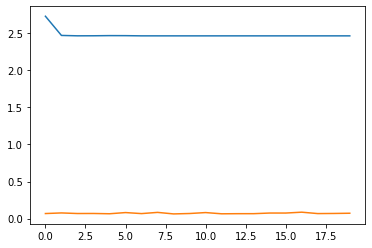

In [20]:
plt.plot(loss_df)

In [21]:
model.evaluate(X_test, y_test)

141/141 [==============================] - 1s 3ms/step - loss: 2.4613 - accuracy: 0.0598


[2.461257219314575, 0.05977777764201164]